# Poverty Prediction Challenge

## Import Data
Load datasets and check dimensions

In [253]:
import pandas as pd
import numpy as np

DATA_DIR = "C:\\Users\\md82\\OneDrive - Anglia Ruskin University\\Documents\\mj-datalab\\poverty-prediction-challenge\\data\\raw"
TRAIN_DATA = DATA_DIR + "\\train_hh_features.csv"
TEST_DATA = DATA_DIR + "\\test_hh_features.csv"
HH_DATA = DATA_DIR + "\\train_hh_gt.csv"
PR_DATA = DATA_DIR + "\\train_rates_gt.csv"
SUB_DIR = "C:\\Users\\md82\\OneDrive - Anglia Ruskin University\\Documents\\mj-datalab\\poverty-prediction-challenge\\data\\submission"

train_data = pd.read_csv(TRAIN_DATA)
test_data = pd.read_csv(TEST_DATA)
hh_data = pd.read_csv(HH_DATA)  
pr_data = pd.read_csv(PR_DATA)

In [19]:
# Check dimensions of data
print("Shape:", train_data.shape)  # (rows, columns)
print("Rows:", len(train_data))
print("Columns:", len(train_data.columns))
train_data.head()

Shape: (104234, 88)
Rows: 104234
Columns: 88


,hhid,com,weight,strata,utl_exp_ppp17,male,hsize,num_children5,num_children10,num_children18,...,consumed4200,consumed4300,consumed4400,consumed4500,consumed4600,consumed4700,consumed4800,consumed4900,consumed5000,survey_id
0,100001,1,75,4,594.80627,Female,1,0,0,0,...,Yes,No,No,No,Yes,Yes,Yes,Yes,No,100000
1,100002,1,150,4,1676.27230,Female,2,0,0,0,...,Yes,No,No,No,No,Yes,Yes,No,No,100000
2,100003,1,375,4,506.93719,Male,5,0,0,2,...,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,100000
3,100004,1,375,4,824.61786,Male,5,0,0,1,...,No,Yes,No,No,No,Yes,Yes,No,No,100000
4,100005,1,525,4,351.47644,Male,7,1,0,0,...,Yes,No,No,Yes,No,Yes,Yes,Yes,No,100000


In [20]:
# Print number of observations per survey_id
print(train_data['survey_id'].value_counts())
print(test_data['survey_id'].value_counts())

survey_id
300000    37462
200000    34584
100000    32188
Name: count, dtype: int64
survey_id
400000    34565
500000    34245
600000    34213
Name: count, dtype: int64


In [21]:
# Check dimensions of data
print("Shape:", test_data.shape)  # (rows, columns)
print("Rows:", len(test_data))
print("Columns:", len(test_data.columns))
test_data.head()

Shape: (103023, 88)
Rows: 103023
Columns: 88


,hhid,com,weight,strata,utl_exp_ppp17,male,hsize,num_children5,num_children10,num_children18,...,consumed4200,consumed4300,consumed4400,consumed4500,consumed4600,consumed4700,consumed4800,consumed4900,consumed5000,survey_id
0,400001,1,320,4,567.80914,Female,4,0,1,0,...,No,No,No,No,No,Yes,Yes,Yes,No,400000
1,400002,1,480,4,561.70367,Female,6,0,1,1,...,Yes,No,No,No,No,Yes,Yes,Yes,No,400000
2,400003,1,320,4,183.16423,Male,4,0,0,0,...,Yes,No,Yes,No,Yes,Yes,No,Yes,No,400000
3,400004,1,320,4,696.02411,Male,4,0,0,1,...,Yes,Yes,No,No,No,Yes,Yes,No,No,400000
4,400005,1,320,4,286.95731,Male,4,0,0,1,...,Yes,No,No,No,No,No,Yes,No,No,400000


In [22]:
# Check dimensions of data
print("Shape:", hh_data.shape)  # (rows, columns)
print("Rows:", len(hh_data))
print("Columns:", len(hh_data.columns))
hh_data.head()

Shape: (104234, 3)
Rows: 104234
Columns: 3


,survey_id,hhid,cons_ppp17
0,100000,100001,25.258402
1,100000,100002,16.996706
2,100000,100003,13.671848
3,100000,100004,7.189475
4,100000,100005,12.308855


In [23]:
# Check dimensions of data
print("Shape:", pr_data.shape)  # (rows, columns)
print("Rows:", len(pr_data))
print("Columns:", len(pr_data.columns))
pr_data.head()

Shape: (3, 20)
Rows: 3
Columns: 20


,survey_id,pct_hh_below_3.17,pct_hh_below_3.94,pct_hh_below_4.60,pct_hh_below_5.26,pct_hh_below_5.88,pct_hh_below_6.47,pct_hh_below_7.06,pct_hh_below_7.70,pct_hh_below_8.40,pct_hh_below_9.13,pct_hh_below_9.87,pct_hh_below_10.70,pct_hh_below_11.62,pct_hh_below_12.69,pct_hh_below_14.03,pct_hh_below_15.64,pct_hh_below_17.76,pct_hh_below_20.99,pct_hh_below_27.37
0,100000,0.067364,0.118927,0.169905,0.221865,0.271564,0.319585,0.366329,0.419816,0.471454,0.523798,0.574413,0.623091,0.671263,0.721329,0.773303,0.819770,0.865121,0.909075,0.954239
1,200000,0.059326,0.111560,0.159023,0.211754,0.263100,0.311758,0.356914,0.407631,0.463443,0.512931,0.559361,0.609337,0.659291,0.708043,0.760932,0.809045,0.860350,0.906385,0.952805
2,300000,0.049803,0.100381,0.149502,0.200144,0.250192,0.300211,0.349596,0.399930,0.449845,0.499930,0.550082,0.599926,0.650088,0.699617,0.750341,0.800111,0.850081,0.899974,0.949988


## Check Proverty Rate Calculation

In [129]:
# Get hh survey 3 and weights
hhs3 = hh_data[hh_data['survey_id'] == 300000][['survey_id','cons_ppp17']]
w3 = train_data[train_data['survey_id'] == 300000][['survey_id','weight']]


In [174]:
hhs_data = hh_data[['survey_id','cons_ppp17']]
w_data = train_data[['survey_id','weight']]


In [268]:
def get_poverty_thresholds(values, weights, surveys, pr_data):

    # Define thresholds
    thresholds = [3.17, 3.94, 4.60, 5.26, 5.88, 6.47, 7.06, 7.70, 8.40, 9.13, 9.87, 10.70, 11.62, 12.69, 14.03, 15.64, 17.76, 20.99, 27.37]
    thresholds = np.array(thresholds, dtype=float)
    pr = []

    for s in range(surveys.shape[0]):
        survey_values = values[values['survey_id'] == surveys[s]][['cons_ppp17']].to_numpy().flatten()
        survey_weights = weights[weights['survey_id'] == surveys[s]][['weight']].to_numpy().flatten()

        # Calculate percentage below each 
        percentages = [(survey_weights[survey_values < t].sum() / survey_weights.sum()) for t in thresholds]
        pr.append(percentages)

    df = pd.DataFrame([pr[0]], columns=pr_data.columns.tolist()[1:])
    for d in range(1,len(pr)):
        df = pd.concat([df, pd.DataFrame([pr[d]], columns=pr_data.columns.tolist()[1:])], ignore_index=True)
    
    df.index = surveys
    df.index.name = "survey_id"

    return df

df = get_poverty_thresholds(hh_data, w_data, surveys=hh_data["survey_id"].unique(), pr_data=pr_data)



In [269]:
df

,pct_hh_below_3.17,pct_hh_below_3.94,pct_hh_below_4.60,pct_hh_below_5.26,pct_hh_below_5.88,pct_hh_below_6.47,pct_hh_below_7.06,pct_hh_below_7.70,pct_hh_below_8.40,pct_hh_below_9.13,pct_hh_below_9.87,pct_hh_below_10.70,pct_hh_below_11.62,pct_hh_below_12.69,pct_hh_below_14.03,pct_hh_below_15.64,pct_hh_below_17.76,pct_hh_below_20.99,pct_hh_below_27.37
survey_id,,,,,,,,,,,,,,,,,,,
100000,0.067364,0.118927,0.169905,0.221865,0.271564,0.319585,0.366329,0.419816,0.471454,0.523798,0.574413,0.623091,0.671263,0.721329,0.773303,0.819770,0.865121,0.909075,0.954239
200000,0.059326,0.111560,0.159023,0.211754,0.263100,0.311758,0.356914,0.407631,0.463443,0.512931,0.559361,0.609337,0.659291,0.708043,0.760932,0.809045,0.860350,0.906385,0.952805
300000,0.049803,0.100381,0.149502,0.200144,0.250192,0.300211,0.349596,0.399930,0.449845,0.499930,0.550082,0.599926,0.650088,0.699617,0.750341,0.800111,0.850081,0.899974,0.949988


In [211]:
df = df.set_index(hh_data["survey_id"].unique())

In [212]:
df.head()

,pct_hh_below_3.17,pct_hh_below_3.94,pct_hh_below_4.60,pct_hh_below_5.26,pct_hh_below_5.88,pct_hh_below_6.47,pct_hh_below_7.06,pct_hh_below_7.70,pct_hh_below_8.40,pct_hh_below_9.13,pct_hh_below_9.87,pct_hh_below_10.70,pct_hh_below_11.62,pct_hh_below_12.69,pct_hh_below_14.03,pct_hh_below_15.64,pct_hh_below_17.76,pct_hh_below_20.99,pct_hh_below_27.37
100000,0.067364,0.118927,0.169905,0.221865,0.271564,0.319585,0.366329,0.419816,0.471454,0.523798,0.574413,0.623091,0.671263,0.721329,0.773303,0.819770,0.865121,0.909075,0.954239
200000,0.059326,0.111560,0.159023,0.211754,0.263100,0.311758,0.356914,0.407631,0.463443,0.512931,0.559361,0.609337,0.659291,0.708043,0.760932,0.809045,0.860350,0.906385,0.952805
300000,0.049803,0.100381,0.149502,0.200144,0.250192,0.300211,0.349596,0.399930,0.449845,0.499930,0.550082,0.599926,0.650088,0.699617,0.750341,0.800111,0.850081,0.899974,0.949988


In [112]:
percentages

[0.04980335690713668,
 0.1003810795861071,
 0.14950154335080076,
 0.20014444988668156,
 0.25019209252172053,
 0.30021080213347995,
 0.34959562948388834,
 0.3999302348248445,
 0.4498449577365705,
 0.49992952764149123,
 0.550081679677303,
 0.5999260224718272,
 0.650088198062994,
 0.6996173523116748,
 0.7503409392440333,
 0.8001114582458962,
 0.8500808187584381,
 0.8999736497333151,
 0.9499877780268293]

In [28]:
# Check data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104234 entries, 0 to 104233
Data columns (total 88 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hhid               104234 non-null  int64  
 1   com                104234 non-null  int64  
 2   weight             104234 non-null  int64  
 3   strata             104234 non-null  int64  
 4   utl_exp_ppp17      104149 non-null  float64
 5   male               104234 non-null  object 
 6   hsize              104234 non-null  int64  
 7   num_children5      104234 non-null  int64  
 8   num_children10     104234 non-null  int64  
 9   num_children18     104234 non-null  int64  
 10  age                104234 non-null  int64  
 11  owner              104234 non-null  object 
 12  water              104234 non-null  object 
 13  toilet             104234 non-null  object 
 14  sewer              104234 non-null  object 
 15  elect              104234 non-null  object 
 16  wa

## Select Variables of Interest

In [29]:
train_data_ss = train_data[["utl_exp_ppp17", "hsize","age","sfworkershh","share_secondary","sworkershh","male"]].copy()
train_data_ss["cons_ppp17"] = hh_data["cons_ppp17"]
train_data_ss.head()

,utl_exp_ppp17,hsize,age,sfworkershh,share_secondary,sworkershh,male,cons_ppp17
0,594.80627,1,75,0.0,0.000000,0.000000,Female,25.258402
1,1676.27230,2,61,0.0,0.000000,0.000000,Female,16.996706
2,506.93719,5,49,0.5,0.333333,0.666667,Male,13.671848
3,824.61786,5,58,0.2,0.250000,1.250000,Male,7.189475
4,351.47644,7,57,0.5,0.333333,0.666667,Male,12.308855


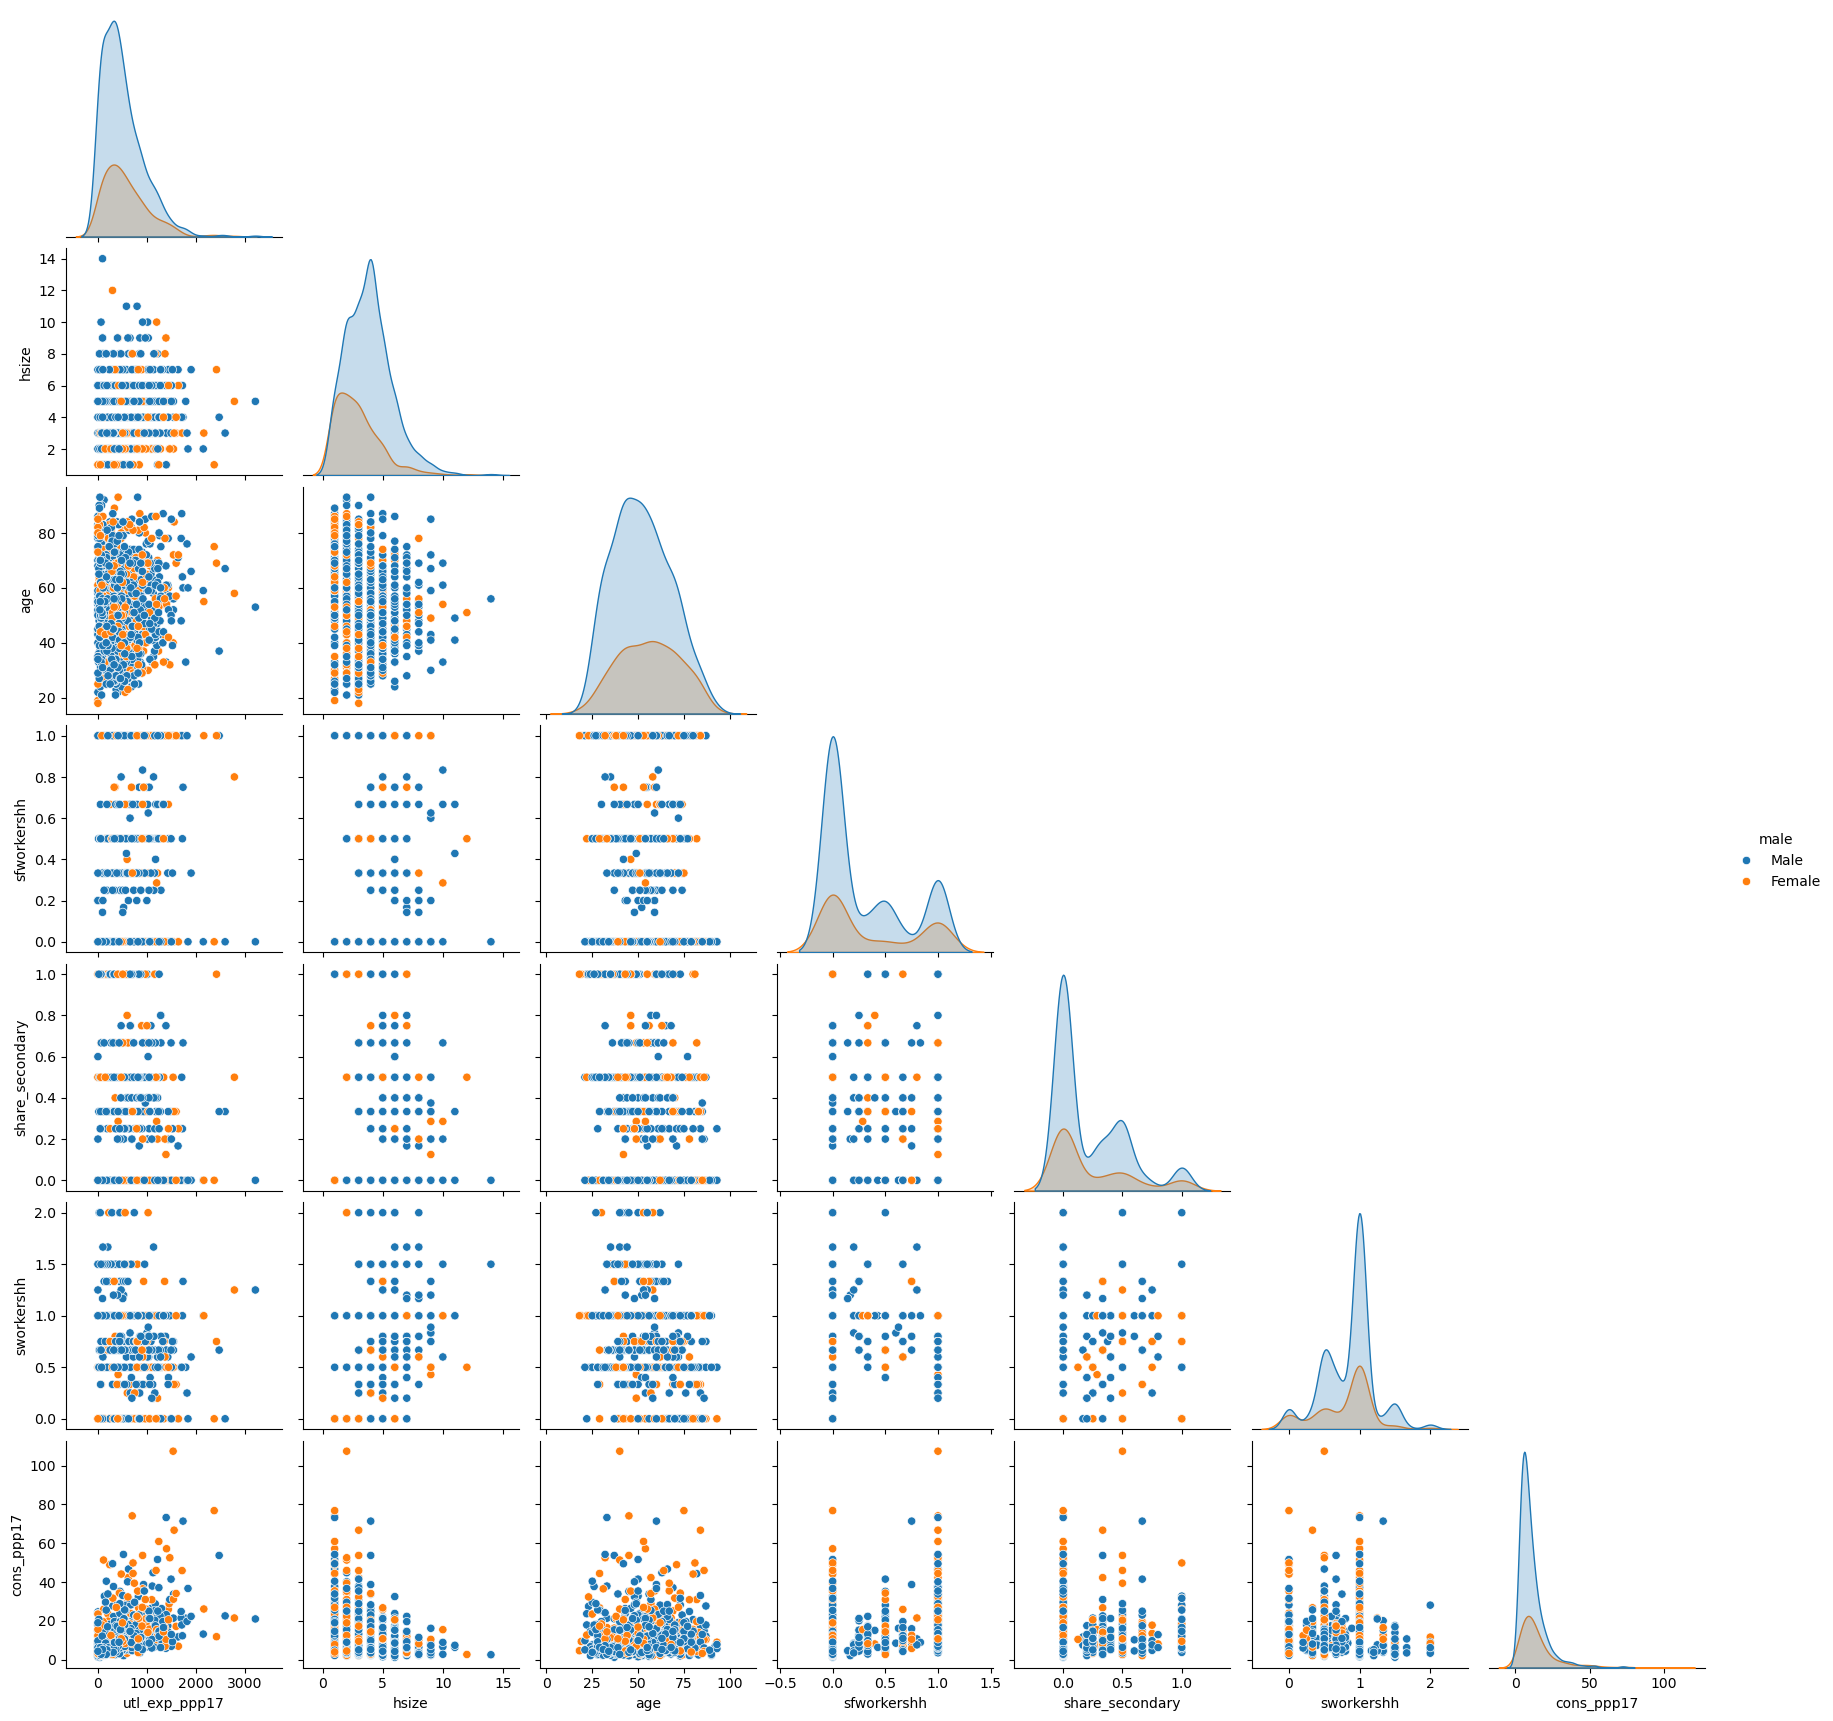

In [12]:
import seaborn as sns
sns.pairplot(train_data_ss.sample(1000),hue="male", corner=True)

## Create benchmark model
Benchmark model: few variables, linear regression, survey number as CV fold

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_predict, train_test_split, GroupKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor


# Select a few variables
X_train = train_data[["utl_exp_ppp17","male", "hsize","age","owner","water","toilet","sewer","elect","employed","educ_max","consumed800"]].copy()
X_train["num_child"] = train_data["num_children5"] + train_data["num_children10"] + train_data["num_children18"]
X_train.head()

X_test = test_data[["utl_exp_ppp17","male", "hsize","age","owner","water","toilet","sewer","elect","employed","educ_max","consumed800"]].copy()
X_test["num_child"] = test_data["num_children5"] + test_data["num_children10"] + test_data["num_children18"]

In [ ]:
y_train = hh_data["cons_ppp17"]

In [ ]:
numeric_cols = X_train.select_dtypes(include="number").columns.tolist()
categorical_cols = X_train.select_dtypes(exclude="number").columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("impute", SimpleImputer(strategy="median")),
            ("scale", StandardScaler())
        ]), numeric_cols),
        ("cat", Pipeline(steps=[
            ("impute", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_cols)
    ],
    remainder="drop"  # or 'passthrough'
)


pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor())  # or LinearRegression(), Lasso(), ElasticNet()
])


groups = train_data["survey_id"]  # every group's rows stay together
cv = GroupKFold(n_splits=3)

y_pred = cross_val_predict(
    estimator=pipe,
    X=X_train, y=y_train,
    groups=groups,     # <- important
    cv=cv,
    method="predict",
    n_jobs=-1
)

y_true = y_train.to_numpy()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"RMSE: {rmse:.8f}")
print(f"MAE: {mae:.8f}")



RMSE: 7.16494787
MAE: 4.20042429


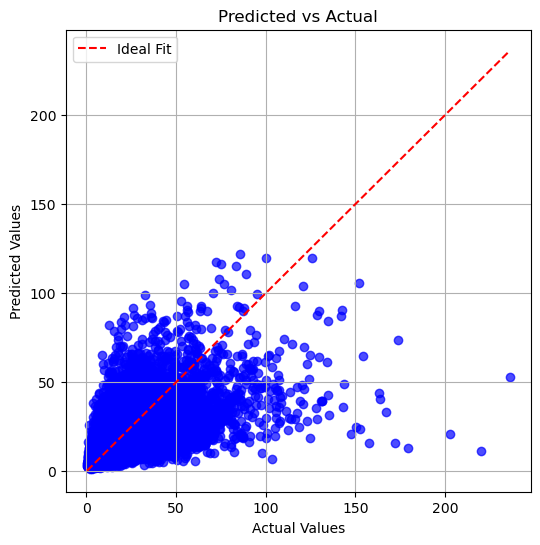

In [37]:
import matplotlib.pyplot as plt

# Plot Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()


## Tune Hyperparameters

In [275]:
param_grid = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [5, 10, 15]
}

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train, groups=groups)
print("\nBest parameters from GridSearchCV:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"\nTrain MSE: {mse:.4f}")
print(f"Train R²: {r2:.4f}")


Best parameters from GridSearchCV:
{'model__max_depth': 10, 'model__n_estimators': 200}

Train MSE: 36.9121
Train R²: 0.6334


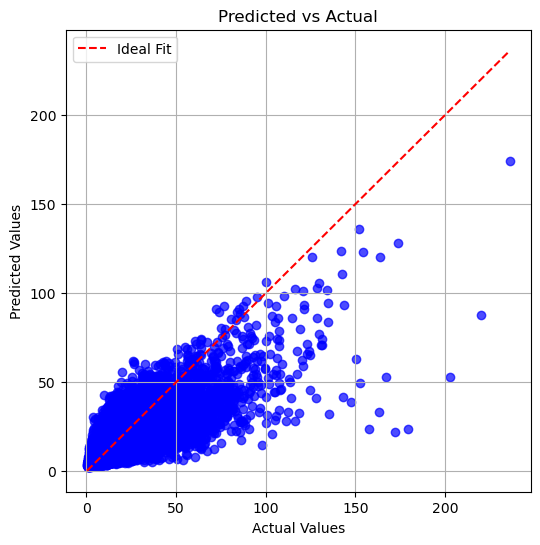

In [276]:
# Plot Predicted vs Actual
plt.figure(figsize=(6,6))
plt.scatter(y_true, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

## Create Submission Files

In [277]:
test_sub = pd.DataFrame(test_data[["survey_id","hhid"]])
test_sub = test_sub.rename(columns={"hhid": "household_id"})
y_pred = pd.DataFrame(y_pred, columns=["cons_ppp17"])

submission = pd.merge(test_sub, y_pred, left_index=True, right_index=True)
submission = submission.set_index("survey_id")

submission.to_csv(SUB_DIR + '\\predicted_household_consumption.csv')

values = submission.reset_index()
weights = test_data[["survey_id", "weight"]]
submission_pr = get_poverty_thresholds(values, weights, surveys = test_data["survey_id"].unique(),pr_data=pr_data)

submission_pr.to_csv(SUB_DIR + '\\predicted_poverty_distribution.csv')


In [96]:
submission.head()

,hhid,cons_ppp17
survey_id,,
400000,400001,10.516068
400000,400002,8.029848
400000,400003,5.242466
400000,400004,13.732281
400000,400005,6.411371


In [ ]:
# TO DO:
# 1. Work with all the variables
# 2. Include survery/year in analysis
# 3. Leave one year out cross validation
# 4. Include weights in model__sample_weights
# 5. Train final model on all years together (one submission!)
# Try XGboots, elastic next, mixed models, bayesian hyerarchical models, and combine prediction (one submission!)